# KCSE Results Analysis\n

> **Privacy Notice**: This notebook analyzes real KCSE examination data. To respect student privacy, all personally identifiable information (student names and index numbers) has been anonymized. Students are identified using anonymized IDs (e.g., STUDENT_00001). **All statistical analyses and visualizations are based on authentic examination results** - only the identities have been protected.

## Dataset Information
- **Total Students**: 19,440
- **Data Source**: KCSE examination results
- **Anonymization**: Student names and index numbers replaced with sequential IDs
- **Data Integrity**: All subject grades and aggregate performance data preserved

In [1]:
import pandas as pd

# Load anonymized KCSE results data\n
df = pd.read_json('results_anonymized.json')

In [2]:
df.head()

,_default
1,"{'index': 'STUDENT_00001', 'subjs': [{'code': ..."
2,"{'index': 'STUDENT_00002', 'subjs': [{'code': ..."
3,"{'index': 'STUDENT_00003', 'subjs': [{'code': ..."
4,"{'index': 'STUDENT_00004', 'subjs': [{'code': ..."
5,"{'index': 'STUDENT_00005', 'subjs': [{'code': ..."


In [3]:
# Run this cell to install all required packages
%pip install pandas seaborn matplotlib numpy scipy statsmodels plotly sqlite3

  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached statsmodels-0.14.6-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached plotly-6.5.1-py3-none-any.whl.metadata (8.5 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 1.10.0 Requires-Python <3.12,>=3.8; 1.10.0rc1 Requires-Python <3.12,>=3.8; 1.10.0rc2 Requires-Python <3.12,>=3.8; 1.10.1 Requires-Python <3.12,>=3.8; 1.11.0 Requires-Python <3.13,>=3.9; 1.11.0rc1 Requires-Python <3.13,>=3.9; 1.11.0rc2 Requires-Python <3.13,>=3.9; 1.11.1 Requires-Python <3.13,>=3.9; 1.11.2 Requires-Python <3.13,>=3.9; 1.11.3 Requires-Python <3.13,>=3.9; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11; 1.9.0 Requires-Python >=3.8,<3.12; 1.9.0rc1 Requires-Python >=3.8,<3.12; 1.9.0rc2 Requires-Python >=3.8,<3.12; 1.9.0r

In [4]:
df = pd.json_normalize(df['_default'])

---
## 📊 Section 1: Data Overview & Quality Metrics

Let's start by understanding the structure and quality of our dataset.

In [5]:
# Display basic dataset information
print(f"Total number of students: {len(df):,}")
print(f"\nDataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")

Total number of students: 19,440

Dataset shape: (19440, 4)

Column names: ['index', 'subjs', 'res.index', 'res.mean']


In [6]:
# Analyze subjects per student
import numpy as np

# Count subjects for each student
df['num_subjects'] = df['subjs'].apply(lambda x: len(x) if isinstance(x, list) else 0)

print("📚 Subjects per Student Statistics:")
print(f"  Minimum subjects: {df['num_subjects'].min()}")
print(f"  Maximum subjects: {df['num_subjects'].max()}")
print(f"  Average subjects: {df['num_subjects'].mean():.2f}")
print(f"  Median subjects: {df['num_subjects'].median():.0f}")
print(f"\nSubject count distribution:")
print(df['num_subjects'].value_counts().sort_index())

📚 Subjects per Student Statistics:
  Minimum subjects: 2
  Maximum subjects: 9
  Average subjects: 8.00
  Median subjects: 8

Subject count distribution:
num_subjects
2        1
7      182
8    19085
9      172
Name: count, dtype: int64


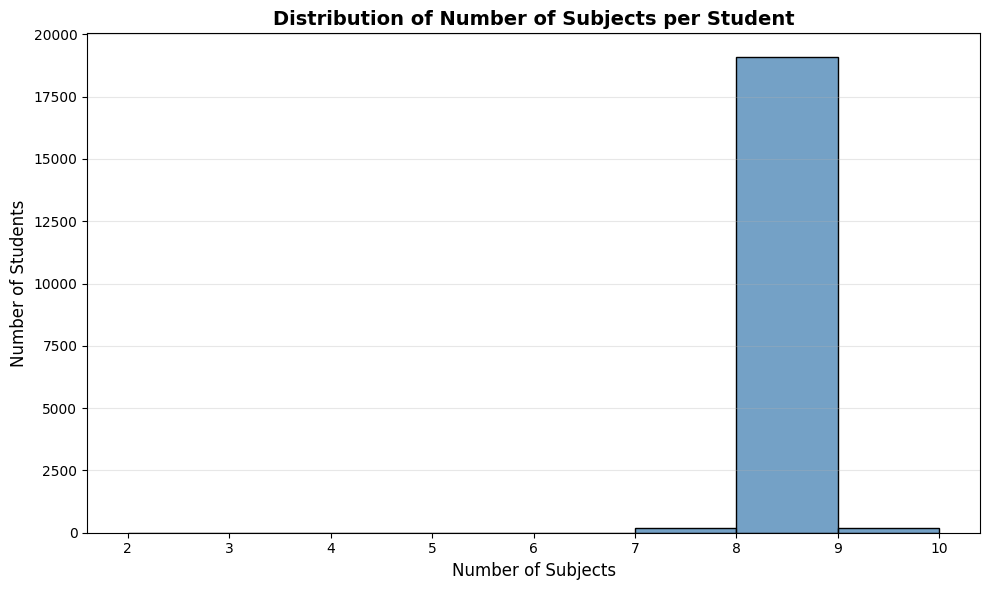

In [7]:
# Visualize subjects per student
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_subjects', bins=range(df['num_subjects'].min(), df['num_subjects'].max()+2), 
             kde=False, color='steelblue', edgecolor='black')
plt.title('Distribution of Number of Subjects per Student', fontsize=14, fontweight='bold')
plt.xlabel('Number of Subjects', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

---
## 🎯 Section 2: Overall Performance Summary

Analysis of aggregate performance across all students.

In [8]:
# Overall grade distribution
print("📈 Overall Mean Grade Distribution:\n")
grade_dist = df['res.mean'].value_counts().sort_index()
grade_pct = (grade_dist / len(df) * 100).round(2)

for grade, count in grade_dist.items():
    pct = grade_pct[grade]
    print(f"  {grade}: {count:,} students ({pct}%)")

print(f"\nTotal: {len(df):,} students")

📈 Overall Mean Grade Distribution:

  A: 955 students (4.91%)
  A- (MINUS): 2,651 students (13.64%)
  B  (PLAIN): 3,728 students (19.18%)
  B+ (PLUS): 3,464 students (17.82%)
  B- (MINUS): 3,348 students (17.22%)
  C  (PLAIN): 1,497 students (7.7%)
  C+ (PLUS): 2,440 students (12.55%)
  C- (MINUS): 722 students (3.71%)
  D  (PLAIN): 50 students (0.26%)
  D+ (PLUS): 240 students (1.23%)
  D- (MINUS): 2 students (0.01%)
  P: 8 students (0.04%)
  U: 8 students (0.04%)
  W: 300 students (1.54%)
  X: 13 students (0.07%)
  Y: 14 students (0.07%)

Total: 19,440 students


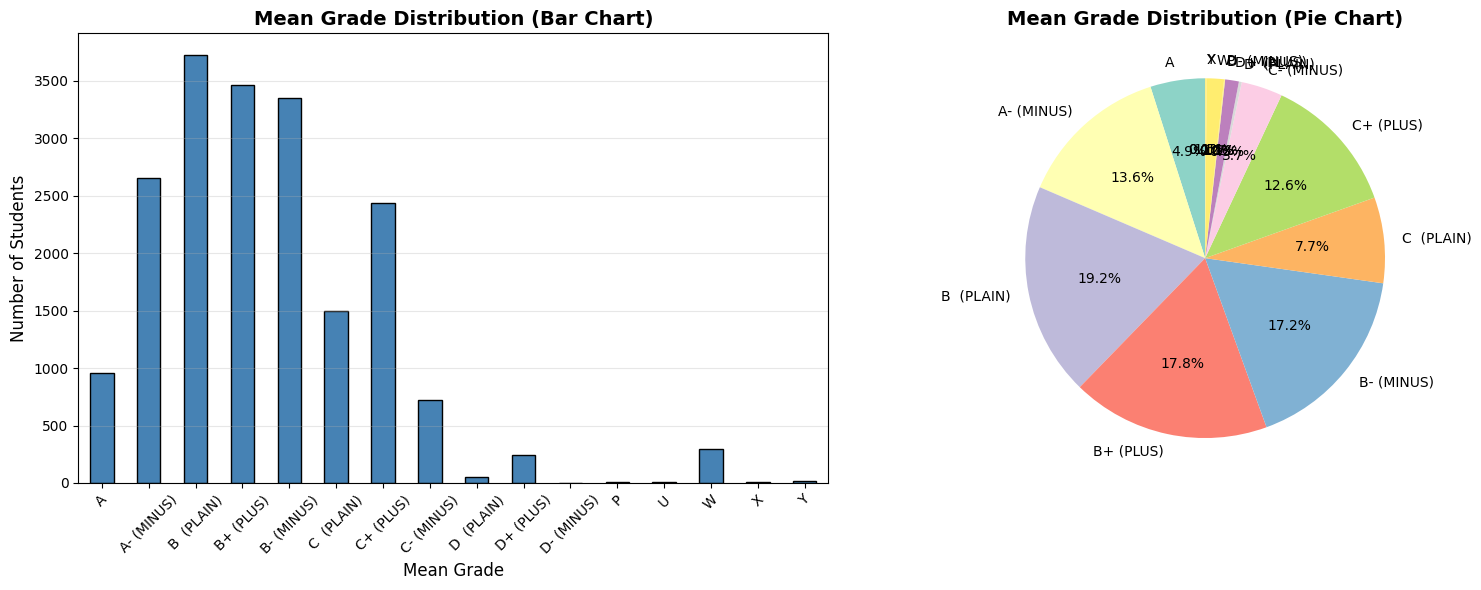

In [9]:
# Visualize overall grade distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
grade_dist.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Mean Grade Distribution (Bar Chart)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Mean Grade', fontsize=12)
ax1.set_ylabel('Number of Students', fontsize=12)
ax1.grid(axis='y', alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Pie chart
colors = plt.cm.Set3(range(len(grade_dist)))
ax2.pie(grade_dist, labels=grade_dist.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_title('Mean Grade Distribution (Pie Chart)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---
## 📚 Section 3: Subject Enrollment Analysis

Which subjects are most popular among students?

In [10]:
# Count enrollments for each subject
subject_enrollment = {}

for _, row in df.iterrows():
    if isinstance(row['subjs'], list):
        for subj in row['subjs']:
            code = subj.get('code', '')
            if code:
                subject_enrollment[code] = subject_enrollment.get(code, 0) + 1

# Convert to sorted list
enrollment_data = sorted(subject_enrollment.items(), key=lambda x: x[1], reverse=True)

print("📊 Subject Enrollment (Top 15):\n")
for i, (code, count) in enumerate(enrollment_data[:15], 1):
    pct = (count / len(df) * 100)
    print(f"{i:2d}. Subject {code}: {count:,} students ({pct:.1f}%)")

📊 Subject Enrollment (Top 15):

 1. Subject 101: 19,440 students (100.0%)
 2. Subject 121: 19,439 students (100.0%)
 3. Subject 102: 19,439 students (100.0%)
 4. Subject 233: 19,438 students (100.0%)
 5. Subject 231: 19,043 students (98.0%)
 6. Subject 232: 12,993 students (66.8%)
 7. Subject 311: 9,880 students (50.8%)
 8. Subject 313: 8,697 students (44.7%)
 9. Subject 312: 8,164 students (42.0%)
10. Subject 565: 6,949 students (35.7%)
11. Subject 451: 3,123 students (16.1%)
12. Subject 443: 2,367 students (12.2%)
13. Subject 314: 1,787 students (9.2%)
14. Subject 441: 1,387 students (7.1%)
15. Subject 501: 862 students (4.4%)


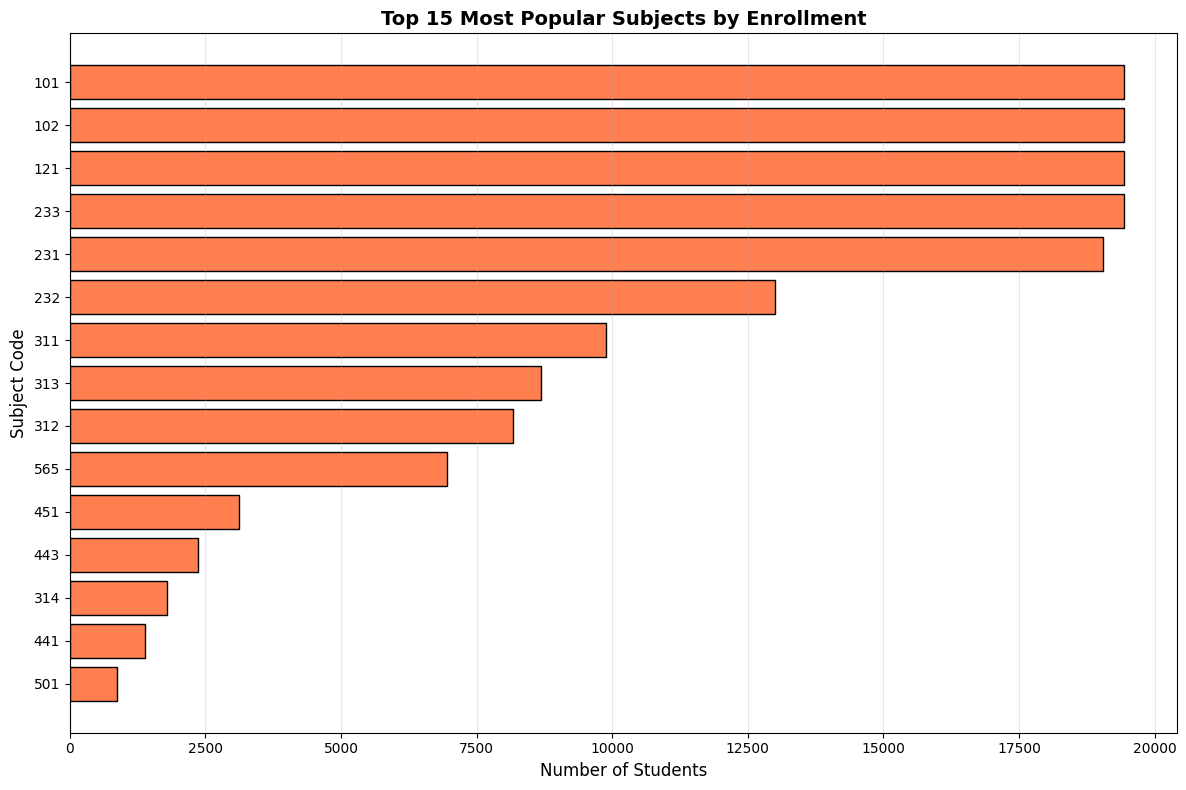

In [11]:
# Visualize subject enrollment
import pandas as pd

enrollment_df = pd.DataFrame(enrollment_data, columns=['Subject Code', 'Enrollment'])
enrollment_df = enrollment_df.sort_values('Enrollment', ascending=True).tail(15)

plt.figure(figsize=(12, 8))
plt.barh(enrollment_df['Subject Code'], enrollment_df['Enrollment'], color='coral', edgecolor='black')
plt.title('Top 15 Most Popular Subjects by Enrollment', fontsize=14, fontweight='bold')
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Subject Code', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

---
## 📈 Section 4: Subject Performance Analysis

How do students perform in different subjects?

In [12]:
# Grade to numeric mapping for analysis
grade_to_points = {
    'A': 12, 'A-': 11, 'B+': 10, 'B': 9, 'B-': 8,
    'C+': 7, 'C': 6, 'C-': 5, 'D+': 4, 'D': 3, 'D-': 2, 'E': 1
}

# Calculate average performance for each subject
subject_performance = {}

for _, row in df.iterrows():
    if isinstance(row['subjs'], list):
        for subj in row['subjs']:
            code = subj.get('code', '')
            grade = subj.get('grade', '').split()[0]  # Get grade letter (e.g., 'A' from 'A (PLAIN)')
            
            if code and grade in grade_to_points:
                if code not in subject_performance:
                    subject_performance[code] = []
                subject_performance[code].append(grade_to_points[grade])

# Calculate average points for each subject
subject_avg = {code: np.mean(points) for code, points in subject_performance.items()}
subject_avg_sorted = sorted(subject_avg.items(), key=lambda x: x[1], reverse=True)

print("🏆 Top 10 Best Performing Subjects (by average grade points):\n")
for i, (code, avg) in enumerate(subject_avg_sorted[:10], 1):
    print(f"{i:2d}. Subject {code}: {avg:.2f} points")

print("\n📉 Bottom 10 Most Challenging Subjects:\n")
for i, (code, avg) in enumerate(subject_avg_sorted[-10:], 1):
    print(f"{i:2d}. Subject {code}: {avg:.2f} points")

🏆 Top 10 Best Performing Subjects (by average grade points):

 1. Subject 449: 11.70 points
 2. Subject 444: 11.56 points
 3. Subject 446: 11.42 points
 4. Subject 451: 11.29 points
 5. Subject 445: 11.19 points
 6. Subject 448: 10.76 points
 7. Subject 450: 10.68 points
 8. Subject 502: 10.66 points
 9. Subject 441: 10.55 points
10. Subject 447: 10.10 points

📉 Bottom 10 Most Challenging Subjects:

 1. Subject 443: 9.12 points
 2. Subject 503: 8.94 points
 3. Subject 313: 8.80 points
 4. Subject 101: 8.69 points
 5. Subject 565: 8.66 points
 6. Subject 314: 8.10 points
 7. Subject 231: 7.76 points
 8. Subject 232: 7.62 points
 9. Subject 121: 7.42 points
10. Subject 233: 7.03 points


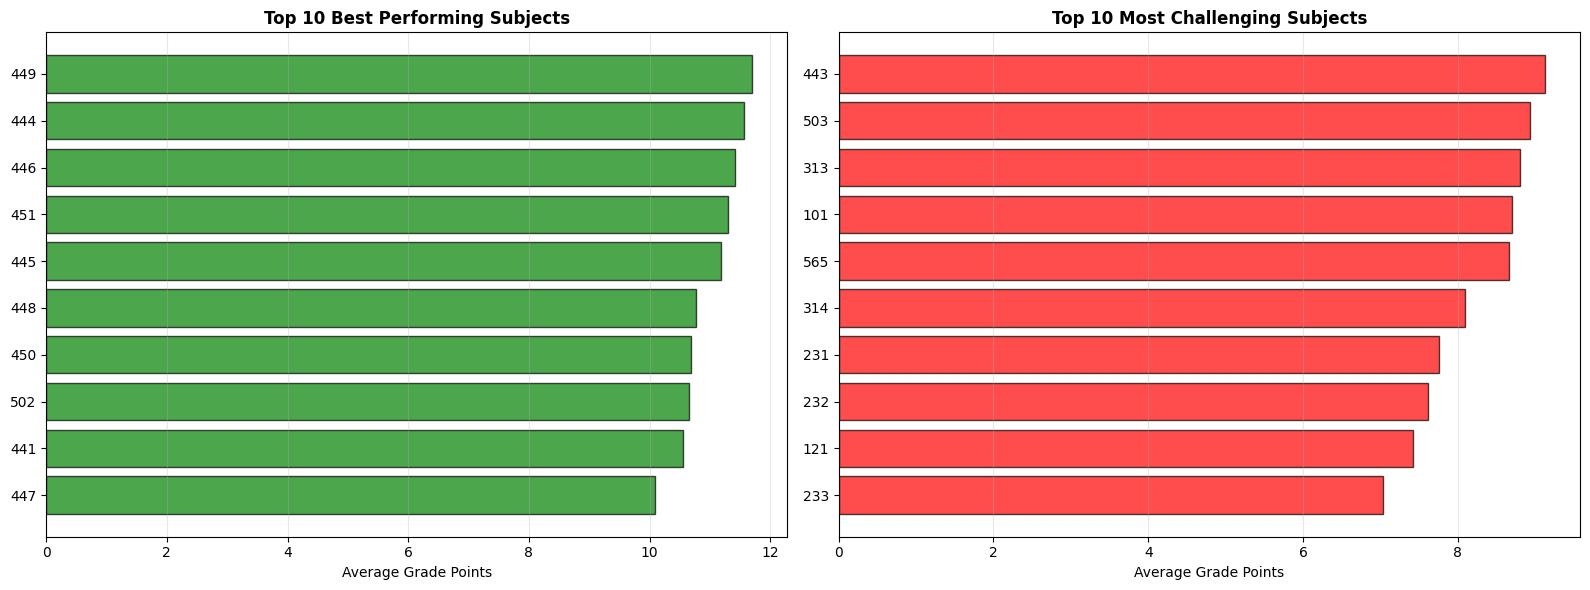

In [13]:
# Visualize subject performance
perf_df = pd.DataFrame(subject_avg_sorted, columns=['Subject Code', 'Average Points'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top performers
top_10 = perf_df.head(10).sort_values('Average Points')
ax1.barh(top_10['Subject Code'], top_10['Average Points'], color='green', alpha=0.7, edgecolor='black')
ax1.set_title('Top 10 Best Performing Subjects', fontsize=12, fontweight='bold')
ax1.set_xlabel('Average Grade Points', fontsize=10)
ax1.grid(axis='x', alpha=0.3)

# Most challenging
bottom_10 = perf_df.tail(10).sort_values('Average Points')
ax2.barh(bottom_10['Subject Code'], bottom_10['Average Points'], color='red', alpha=0.7, edgecolor='black')
ax2.set_title('Top 10 Most Challenging Subjects', fontsize=12, fontweight='bold')
ax2.set_xlabel('Average Grade Points', fontsize=10)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

---
## 🔑 Section 5: Core Subjects Deep Dive

Detailed analysis of the three compulsory subjects: Mathematics (121), English (101), and Kiswahili (102).

In [14]:
# Analyze core subjects
core_subjects = {'121': 'Mathematics', '101': 'English', '102': 'Kiswahili'}
core_grades = {code: [] for code in core_subjects.keys()}

for _, row in df.iterrows():
    if isinstance(row['subjs'], list):
        for subj in row['subjs']:
            code = subj.get('code', '')
            if code in core_subjects:
                grade = subj.get('grade', '').split()[0]
                core_grades[code].append(grade)

# Display statistics for each core subject
for code, name in core_subjects.items():
    grades = core_grades[code]
    print(f"\n📖 {name} (Code {code}):")
    print(f"  Total students: {len(grades):,}")
    
    if grades:
        grade_counts = pd.Series(grades).value_counts().sort_index()
        print(f"  Grade distribution:")
        for grade, count in grade_counts.items():
            pct = (count / len(grades) * 100)
            print(f"    {grade}: {count:,} ({pct:.1f}%)")


📖 Mathematics (Code 121):
  Total students: 19,439
  Grade distribution:
    A: 2,896 (14.9%)
    A-: 1,540 (7.9%)
    B: 1,760 (9.1%)
    B+: 1,737 (8.9%)
    B-: 1,807 (9.3%)
    C: 1,572 (8.1%)
    C+: 1,731 (8.9%)
    C-: 1,454 (7.5%)
    D: 1,988 (10.2%)
    D+: 1,307 (6.7%)
    D-: 1,058 (5.4%)
    E: 258 (1.3%)
    P: 8 (0.0%)
    W: 300 (1.5%)
    X: 18 (0.1%)
    Y: 5 (0.0%)

📖 English (Code 101):
  Total students: 19,440
  Grade distribution:
    A: 1,443 (7.4%)
    A-: 2,291 (11.8%)
    B: 3,745 (19.3%)
    B+: 3,328 (17.1%)
    B-: 3,231 (16.6%)
    C: 1,376 (7.1%)
    C+: 2,426 (12.5%)
    C-: 720 (3.7%)
    D: 209 (1.1%)
    D+: 329 (1.7%)
    D-: 15 (0.1%)
    P: 8 (0.0%)
    W: 300 (1.5%)
    X: 19 (0.1%)

📖 Kiswahili (Code 102):
  Total students: 19,439
  Grade distribution:
    A: 2,789 (14.3%)
    A-: 3,754 (19.3%)
    B: 3,149 (16.2%)
    B+: 4,065 (20.9%)
    B-: 1,985 (10.2%)
    C: 736 (3.8%)
    C+: 1,448 (7.4%)
    C-: 472 (2.4%)
    D: 302 (1.6%)
    D+: 324 

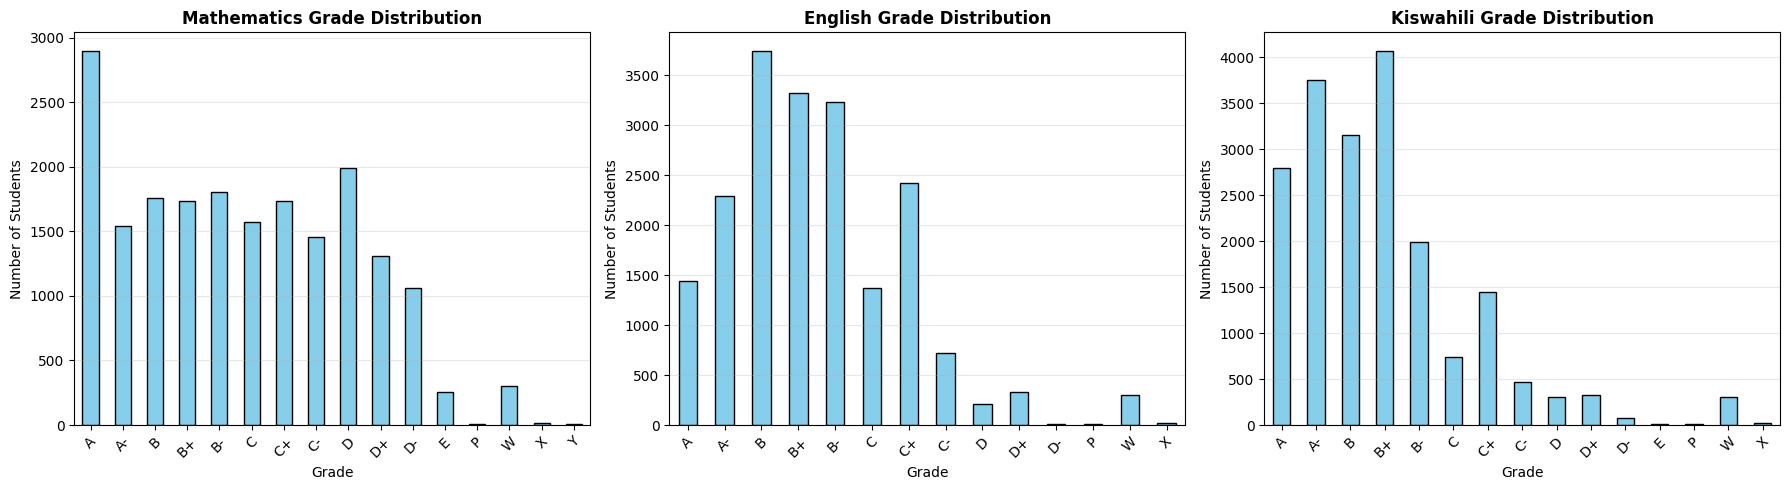

In [15]:
# Visualize core subjects performance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (code, name) in enumerate(core_subjects.items()):
    grades = core_grades[code]
    if grades:
        grade_counts = pd.Series(grades).value_counts().sort_index()
        grade_counts.plot(kind='bar', ax=axes[idx], color='skyblue', edgecolor='black')
        axes[idx].set_title(f'{name} Grade Distribution', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Grade', fontsize=10)
        axes[idx].set_ylabel('Number of Students', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---
## 🔗 Section 6: Subject Correlation Analysis

Which subjects tend to be taken together? How do performances in different subjects relate?

In [16]:
# Create a matrix of subject grades for correlation analysis
# We'll focus on the most popular subjects
top_subjects = [code for code, _ in enrollment_data[:12]]  # Top 12 subjects

# Create a dataframe with grades for each subject
subject_grade_matrix = pd.DataFrame(index=range(len(df)))

for subj_code in top_subjects:
    grades = []
    for _, row in df.iterrows():
        grade_found = None
        if isinstance(row['subjs'], list):
            for subj in row['subjs']:
                if subj.get('code') == subj_code:
                    grade = subj.get('grade', '').split()[0]
                    grade_found = grade_to_points.get(grade, np.nan)
                    break
        grades.append(grade_found)
    subject_grade_matrix[subj_code] = grades

# Calculate correlation matrix
correlation_matrix = subject_grade_matrix.corr()

print("📊 Subject Correlation Matrix (Top 12 Subjects)")
print("\nNote: Values range from -1 to 1, where:")
print("  1.0 = Perfect positive correlation")
print("  0.0 = No correlation")
print(" -1.0 = Perfect negative correlation\n")

📊 Subject Correlation Matrix (Top 12 Subjects)

Note: Values range from -1 to 1, where:
  1.0 = Perfect positive correlation
  0.0 = No correlation
 -1.0 = Perfect negative correlation



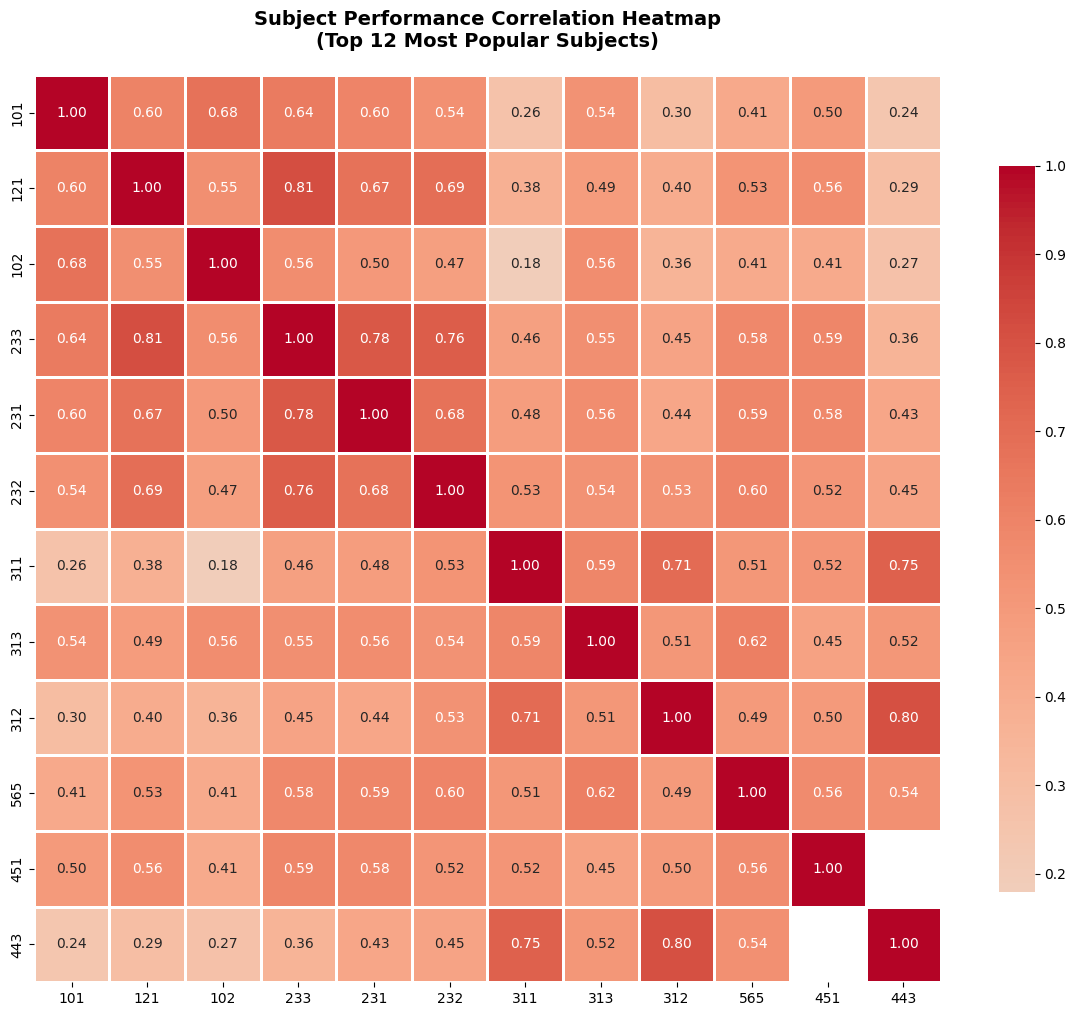


💡 Interpretation:
  - Darker red = Strong positive correlation (students who do well in one tend to do well in the other)
  - Darker blue = Strong negative correlation (inverse relationship)
  - White = Little to no correlation


In [17]:
# Visualize correlation matrix as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Subject Performance Correlation Heatmap\n(Top 12 Most Popular Subjects)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("  - Darker red = Strong positive correlation (students who do well in one tend to do well in the other)")
print("  - Darker blue = Strong negative correlation (inverse relationship)")
print("  - White = Little to no correlation")

---
## 💡 Section 7: Key Insights & Findings

Summary of the most important findings from our analysis.

In [18]:
# Generate key insights
print("="*60)
print("KEY INSIGHTS FROM KCSE RESULTS ANALYSIS")
print("="*60)

print("\n📊 DATASET OVERVIEW:")
print(f"  • Total students analyzed: {len(df):,}")
print(f"  • Average subjects per student: {df['num_subjects'].mean():.1f}")
print(f"  • Total unique subjects offered: {len(subject_enrollment)}")

print("\n🎯 OVERALL PERFORMANCE:")
top_grade = grade_dist.index[0]
top_grade_count = grade_dist.iloc[0]
top_grade_pct = (top_grade_count / len(df) * 100)
print(f"  • Most common mean grade: {top_grade} ({top_grade_count:,} students, {top_grade_pct:.1f}%)")

# Calculate pass rate (C- and above)
pass_grades = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-']
pass_count = sum(grade_dist.get(g, 0) for g in pass_grades)
pass_rate = (pass_count / len(df) * 100)
print(f"  • Pass rate (C- and above): {pass_rate:.1f}%")

print("\n📚 SUBJECT POPULARITY:")
print(f"  • Most popular subject: Code {enrollment_data[0][0]} ({enrollment_data[0][1]:,} students)")
print(f"  • Least popular subject: Code {enrollment_data[-1][0]} ({enrollment_data[-1][1]:,} students)")

print("\n🏆 SUBJECT PERFORMANCE:")
print(f"  • Best performing subject: Code {subject_avg_sorted[0][0]} (avg: {subject_avg_sorted[0][1]:.2f} points)")
print(f"  • Most challenging subject: Code {subject_avg_sorted[-1][0]} (avg: {subject_avg_sorted[-1][1]:.2f} points)")

print("\n🔑 CORE SUBJECTS:")
for code, name in core_subjects.items():
    if core_grades[code]:
        avg_points = np.mean([grade_to_points.get(g, 0) for g in core_grades[code] if g in grade_to_points])
        print(f"  • {name}: {len(core_grades[code]):,} students, avg {avg_points:.2f} points")

print("\n" + "="*60)

KEY INSIGHTS FROM KCSE RESULTS ANALYSIS

📊 DATASET OVERVIEW:
  • Total students analyzed: 19,440
  • Average subjects per student: 8.0
  • Total unique subjects offered: 26

🎯 OVERALL PERFORMANCE:
  • Most common mean grade: A (955 students, 4.9%)
  • Pass rate (C- and above): 4.9%

📚 SUBJECT POPULARITY:
  • Most popular subject: Code 101 (19,440 students)
  • Least popular subject: Code 447 (62 students)

🏆 SUBJECT PERFORMANCE:
  • Best performing subject: Code 449 (avg: 11.70 points)
  • Most challenging subject: Code 233 (avg: 7.03 points)

🔑 CORE SUBJECTS:
  • Mathematics: 19,439 students, avg 7.42 points
  • English: 19,440 students, avg 8.69 points
  • Kiswahili: 19,439 students, avg 9.36 points

